In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
df = pd.read_csv("../data/weather_sp_jan_aug.csv", on_bad_lines='skip', delimiter=';', thousands=',')
cols = [
  'Data',
  'Hora (UTC)',
 'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)',
 'Umi. Ins. (%)',	'Umi. Max. (%)',	'Umi. Min. (%)',
 'Pto Orvalho Ins. (C)',	'Pto Orvalho Max. (C)',	'Pto Orvalho Min. (C)',
 'Pressao Ins. (hPa)',	'Pressao Max. (hPa)',	'Pressao Min. (hPa)',
 'Chuva (mm)'
]
df = df[cols]
df


,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Chuva (mm)
0,01/01/2023,0,215.0,221.0,210.0,940.0,1000.0,890.0,206.0,217.0,200.0,9508.0,9511.0,9505.0,2.0
1,01/01/2023,100,211.0,217.0,211.0,990.0,990.0,930.0,209.0,209.0,205.0,9511.0,9511.0,9507.0,0.0
2,01/01/2023,200,210.0,212.0,209.0,990.0,1000.0,990.0,209.0,211.0,208.0,9511.0,9513.0,9511.0,0.0
3,01/01/2023,300,212.0,213.0,209.0,990.0,1000.0,980.0,210.0,211.0,208.0,9506.0,9511.0,9505.0,0.0
4,01/01/2023,400,206.0,213.0,205.0,990.0,990.0,960.0,204.0,210.0,203.0,9497.0,9506.0,9497.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,01/01/2024,1900,301.0,321.0,299.0,370.0,410.0,350.0,138.0,162.0,138.0,9456.0,9461.0,9456.0,0.0
8780,01/01/2024,2000,306.0,310.0,298.0,390.0,410.0,340.0,151.0,153.0,135.0,9454.0,9456.0,9454.0,0.0
8781,01/01/2024,2100,286.0,306.0,286.0,470.0,470.0,390.0,162.0,163.0,154.0,9457.0,9457.0,9453.0,0.0
8782,01/01/2024,2200,268.0,286.0,268.0,540.0,540.0,470.0,166.0,166.0,161.0,9463.0,9463.0,9457.0,0.0


In [46]:
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')
df['Hora (UTC)'] = df['Hora (UTC)'].apply(lambda x: f"{int(x):04d}")
df['Hora (UTC)'] = pd.to_datetime(df['Hora (UTC)'], format='%H%M').dt.strftime('%H:%M:%S')

In [47]:
print(df.isnull().sum())

colunas_data_hora = ['Data', 'Hora (UTC)']
colunas_a_preencher = [col for col in df.columns if col not in colunas_data_hora]
df[colunas_a_preencher] = df[colunas_a_preencher].fillna(df[colunas_a_preencher].mean())
print(df.isnull().sum())

Data                      0
Hora (UTC)                0
Temp. Ins. (C)            1
Temp. Max. (C)            1
Temp. Min. (C)            1
Umi. Ins. (%)           721
Umi. Max. (%)           776
Umi. Min. (%)           776
Pto Orvalho Ins. (C)    721
Pto Orvalho Max. (C)    785
Pto Orvalho Min. (C)    785
Pressao Ins. (hPa)        1
Pressao Max. (hPa)        1
Pressao Min. (hPa)        1
Chuva (mm)                1
dtype: int64
Data                    0
Hora (UTC)              0
Temp. Ins. (C)          0
Temp. Max. (C)          0
Temp. Min. (C)          0
Umi. Ins. (%)           0
Umi. Max. (%)           0
Umi. Min. (%)           0
Pto Orvalho Ins. (C)    0
Pto Orvalho Max. (C)    0
Pto Orvalho Min. (C)    0
Pressao Ins. (hPa)      0
Pressao Max. (hPa)      0
Pressao Min. (hPa)      0
Chuva (mm)              0
dtype: int64


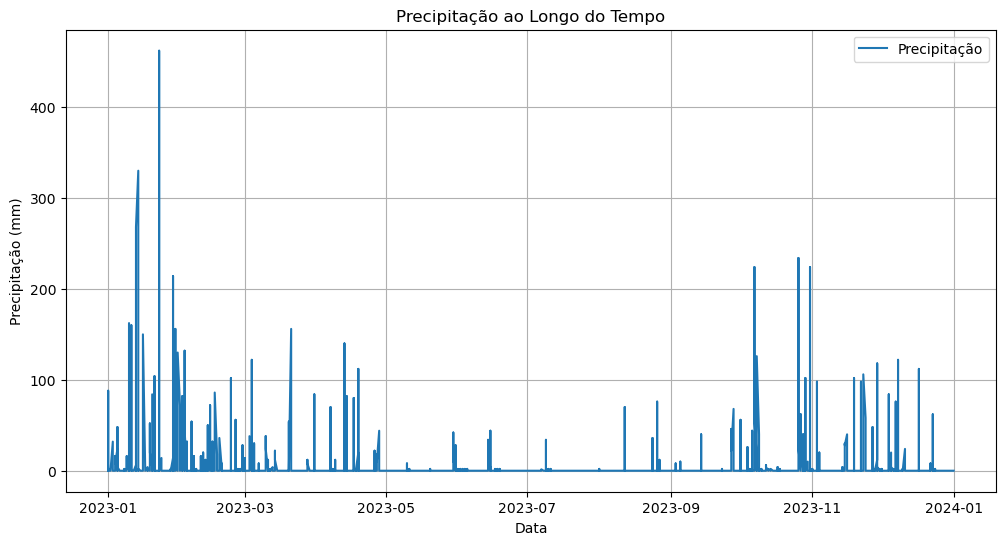

In [48]:
df.set_index('Data', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Chuva (mm)'], label='Precipitação')
plt.xlabel('Data')
plt.ylabel('Precipitação (mm)')
plt.title('Precipitação ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
import seaborn as sns

# Plotar a matriz de correlação
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

ValueError: could not convert string to float: '00:00:00'

<Figure size 1200x1000 with 0 Axes>

In [51]:
from sklearn.model_selection import train_test_split

# Selecionar características e alvo
X = df[['Temp. Ins. (C)', 'Umi. Ins. (%)', 'Pressao Ins. (hPa)']]
y = df['Chuva (mm)']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 100.8985325586989
R²: 0.012797697373770789


In [53]:
from sklearn.model_selection import GridSearchCV

# Exemplo com Random Forest
rf = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'max_depth': 10, 'n_estimators': 200}


In [54]:
rf = RandomForestRegressor(n_estimators=200, max_depth=10)
rf.fit(X_train, y_train)
rfy_pred = rf.predict(X_test)

In [55]:
# testando
#03/01/2024	1900	26,2	27,5	25,0	69,0	75,0	63,0	20,0	20,4	19,0	943,6	944,1	943,2	1,3	206,0	9,6	507,00	0,2
real_df = pd.read_csv("../data/real_data.csv", on_bad_lines='skip', delimiter=';', thousands=',')
real_df['Data'] = pd.to_datetime(real_df['Data'], format='%d/%m/%Y')
real_df['Hora (UTC)'] = real_df['Hora (UTC)'].apply(lambda x: f"{int(x):04d}")
real_df['Hora (UTC)'] = pd.to_datetime(real_df['Hora (UTC)'], format='%H%M').dt.strftime('%H:%M:%S')

X_real = real_df[['Temp. Ins. (C)', 'Umi. Ins. (%)', 'Pressao Ins. (hPa)']]


In [57]:
print(real_df.isnull().sum())

r_colunas_data_hora = ['Data', 'Hora (UTC)']
r_colunas_a_preencher = [col for col in real_df.columns if col not in r_colunas_data_hora]
real_df[r_colunas_a_preencher] = real_df[r_colunas_a_preencher].fillna(real_df[r_colunas_a_preencher].mean())
print(real_df.isnull().sum())

Data                      0
Hora (UTC)                0
Temp. Ins. (C)            0
Temp. Max. (C)            0
Temp. Min. (C)            0
Umi. Ins. (%)            48
Umi. Max. (%)            48
Umi. Min. (%)            48
Pto Orvalho Ins. (C)     48
Pto Orvalho Max. (C)     48
Pto Orvalho Min. (C)     48
Pressao Ins. (hPa)        0
Pressao Max. (hPa)        0
Pressao Min. (hPa)        0
Vel. Vento (m/s)          0
Dir. Vento (m/s)          0
Raj. Vento (m/s)          0
Radiacao (KJ/m²)        319
Chuva (mm)                0
dtype: int64
Data                    0
Hora (UTC)              0
Temp. Ins. (C)          0
Temp. Max. (C)          0
Temp. Min. (C)          0
Umi. Ins. (%)           0
Umi. Max. (%)           0
Umi. Min. (%)           0
Pto Orvalho Ins. (C)    0
Pto Orvalho Max. (C)    0
Pto Orvalho Min. (C)    0
Pressao Ins. (hPa)      0
Pressao Max. (hPa)      0
Pressao Min. (hPa)      0
Vel. Vento (m/s)        0
Dir. Vento (m/s)        0
Raj. Vento (m/s)        0
Radiacao (KJ/

In [62]:
X_real = real_df[['Temp. Ins. (C)', 'Umi. Ins. (%)', 'Pressao Ins. (hPa)']]
y_real_pred = rf.predict(X_real)
real_df['Previsao Chuva (mm)'] = y_real_pred
real_df

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm),Previsao Chuva (mm)
0,2024-01-01,00:00:00,222,236,222,700.0,700.0,650.0,164.0,166.0,164.0,9499,9499,9490,38,1490,89,156683.741648,0,0.173586
1,2024-01-01,01:00:00,217,223,217,720.0,720.0,690.0,165.0,165.0,164.0,9504,9505,9499,43,1430,78,156683.741648,0,0.068903
2,2024-01-01,02:00:00,215,217,214,730.0,740.0,720.0,165.0,165.0,165.0,9504,9507,9504,37,1390,72,156683.741648,0,0.075247
3,2024-01-01,03:00:00,214,215,213,740.0,740.0,730.0,166.0,166.0,164.0,9502,9504,9500,37,1480,72,156683.741648,0,0.077357
4,2024-01-01,04:00:00,210,215,210,750.0,750.0,730.0,164.0,166.0,164.0,9496,9503,9496,31,1490,67,156683.741648,0,0.075806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2024-02-01,19:00:00,301,304,295,420.0,430.0,360.0,159.0,159.0,132.0,9499,9506,9499,30,1470,68,256090.000000,0,0.000000
764,2024-02-01,20:00:00,270,303,269,550.0,550.0,340.0,172.0,177.0,127.0,9504,9504,9497,81,1400,131,153900.000000,0,0.000000
765,2024-02-01,21:00:00,256,270,256,550.0,550.0,510.0,158.0,171.0,154.0,9508,9508,9502,55,1300,131,73200.000000,0,0.000000
766,2024-02-01,22:00:00,240,256,240,620.0,620.0,550.0,164.0,164.0,159.0,9514,9515,9507,40,1290,108,7270.000000,0,0.000000


In [65]:

# Exemplo com Random Forest
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
y_lr_real = lr.predict(X_real)
real_df['Previsao Chuva (mm)'] = y_lr_real
real_df

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm),Previsao Chuva (mm)
0,2024-01-01,00:00:00,222,236,222,700.0,700.0,650.0,164.0,166.0,164.0,9499,9499,9490,38,1490,89,156683.741648,0,1.858040
1,2024-01-01,01:00:00,217,223,217,720.0,720.0,690.0,165.0,165.0,164.0,9504,9505,9499,43,1430,78,156683.741648,0,1.882765
2,2024-01-01,02:00:00,215,217,214,730.0,740.0,720.0,165.0,165.0,165.0,9504,9507,9504,37,1390,72,156683.741648,0,1.963327
3,2024-01-01,03:00:00,214,215,213,740.0,740.0,730.0,166.0,166.0,164.0,9502,9504,9500,37,1480,72,156683.741648,0,2.100405
4,2024-01-01,04:00:00,210,215,210,750.0,750.0,730.0,164.0,166.0,164.0,9496,9503,9496,31,1490,67,156683.741648,0,2.334225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2024-02-01,19:00:00,301,304,295,420.0,430.0,360.0,159.0,159.0,132.0,9499,9506,9499,30,1470,68,256090.000000,0,-0.322793
764,2024-02-01,20:00:00,270,303,269,550.0,550.0,340.0,172.0,177.0,127.0,9504,9504,9497,81,1400,131,153900.000000,0,0.575091
765,2024-02-01,21:00:00,256,270,256,550.0,550.0,510.0,158.0,171.0,154.0,9508,9508,9502,55,1300,131,73200.000000,0,0.422970
766,2024-02-01,22:00:00,240,256,240,620.0,620.0,550.0,164.0,164.0,159.0,9514,9515,9507,40,1290,108,7270.000000,0,0.820622


In [66]:
from sklearn.linear_model import ARDRegression
# Exemplo com Random Forest
adr = ARDRegression()
param_grid = {'alpha_1': [1e-6, 1e-1], 'alpha_2': [1e-6, 1e-1], 'lambda_1': [1e-6, 1e-1], 'lambda_2': [1e-6, 1e-1]}
grid_search = GridSearchCV(estimator=adr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'alpha_1': 1e-06, 'alpha_2': 0.1, 'lambda_1': 0.1, 'lambda_2': 0.1}


In [72]:
adr = ARDRegression()
adr.fit(X_train, y_train)
adr_pred = adr.predict(X_test)
y_adr_real = adr.predict(X_real)
real_df['Previsao Chuva (mm)'] = y_adr_real
real_df

,Data,Hora (UTC),Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm),Previsao Chuva (mm)
0,2024-01-01,00:00:00,222,236,222,700.0,700.0,650.0,164.0,166.0,164.0,9499,9499,9490,38,1490,89,156683.741648,0,1.760227
1,2024-01-01,01:00:00,217,223,217,720.0,720.0,690.0,165.0,165.0,164.0,9504,9505,9499,43,1430,78,156683.741648,0,1.642484
2,2024-01-01,02:00:00,215,217,214,730.0,740.0,720.0,165.0,165.0,165.0,9504,9507,9504,37,1390,72,156683.741648,0,1.642484
3,2024-01-01,03:00:00,214,215,213,740.0,740.0,730.0,166.0,166.0,164.0,9502,9504,9500,37,1480,72,156683.741648,0,1.689581
4,2024-01-01,04:00:00,210,215,210,750.0,750.0,730.0,164.0,166.0,164.0,9496,9503,9496,31,1490,67,156683.741648,0,1.830873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2024-02-01,19:00:00,301,304,295,420.0,430.0,360.0,159.0,159.0,132.0,9499,9506,9499,30,1470,68,256090.000000,0,1.760227
764,2024-02-01,20:00:00,270,303,269,550.0,550.0,340.0,172.0,177.0,127.0,9504,9504,9497,81,1400,131,153900.000000,0,1.642484
765,2024-02-01,21:00:00,256,270,256,550.0,550.0,510.0,158.0,171.0,154.0,9508,9508,9502,55,1300,131,73200.000000,0,1.548289
766,2024-02-01,22:00:00,240,256,240,620.0,620.0,550.0,164.0,164.0,159.0,9514,9515,9507,40,1290,108,7270.000000,0,1.406997
